# Second Phase Evaluation Project - Temperature Forecast Project using ML

# Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

Dataset Link-

https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings('ignore')

In [3]:
Df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
Df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [7]:
Df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [5]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [4]:
Df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [10]:
Df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

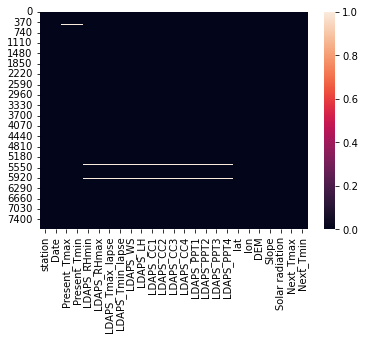

In [12]:
sns.heatmap(Df.isnull())
plt.show()

In [13]:
Df=Df.dropna() #With this we will drop a,l the missing or null values present in the dataset

In [14]:
Df.isnull().sum().sum()

0

In [15]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


In [16]:
Df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


In [24]:
Df['Date']=pd.to_datetime(Df['Date'])        #Here, we changed the date column from object type to date type

In [25]:
Df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

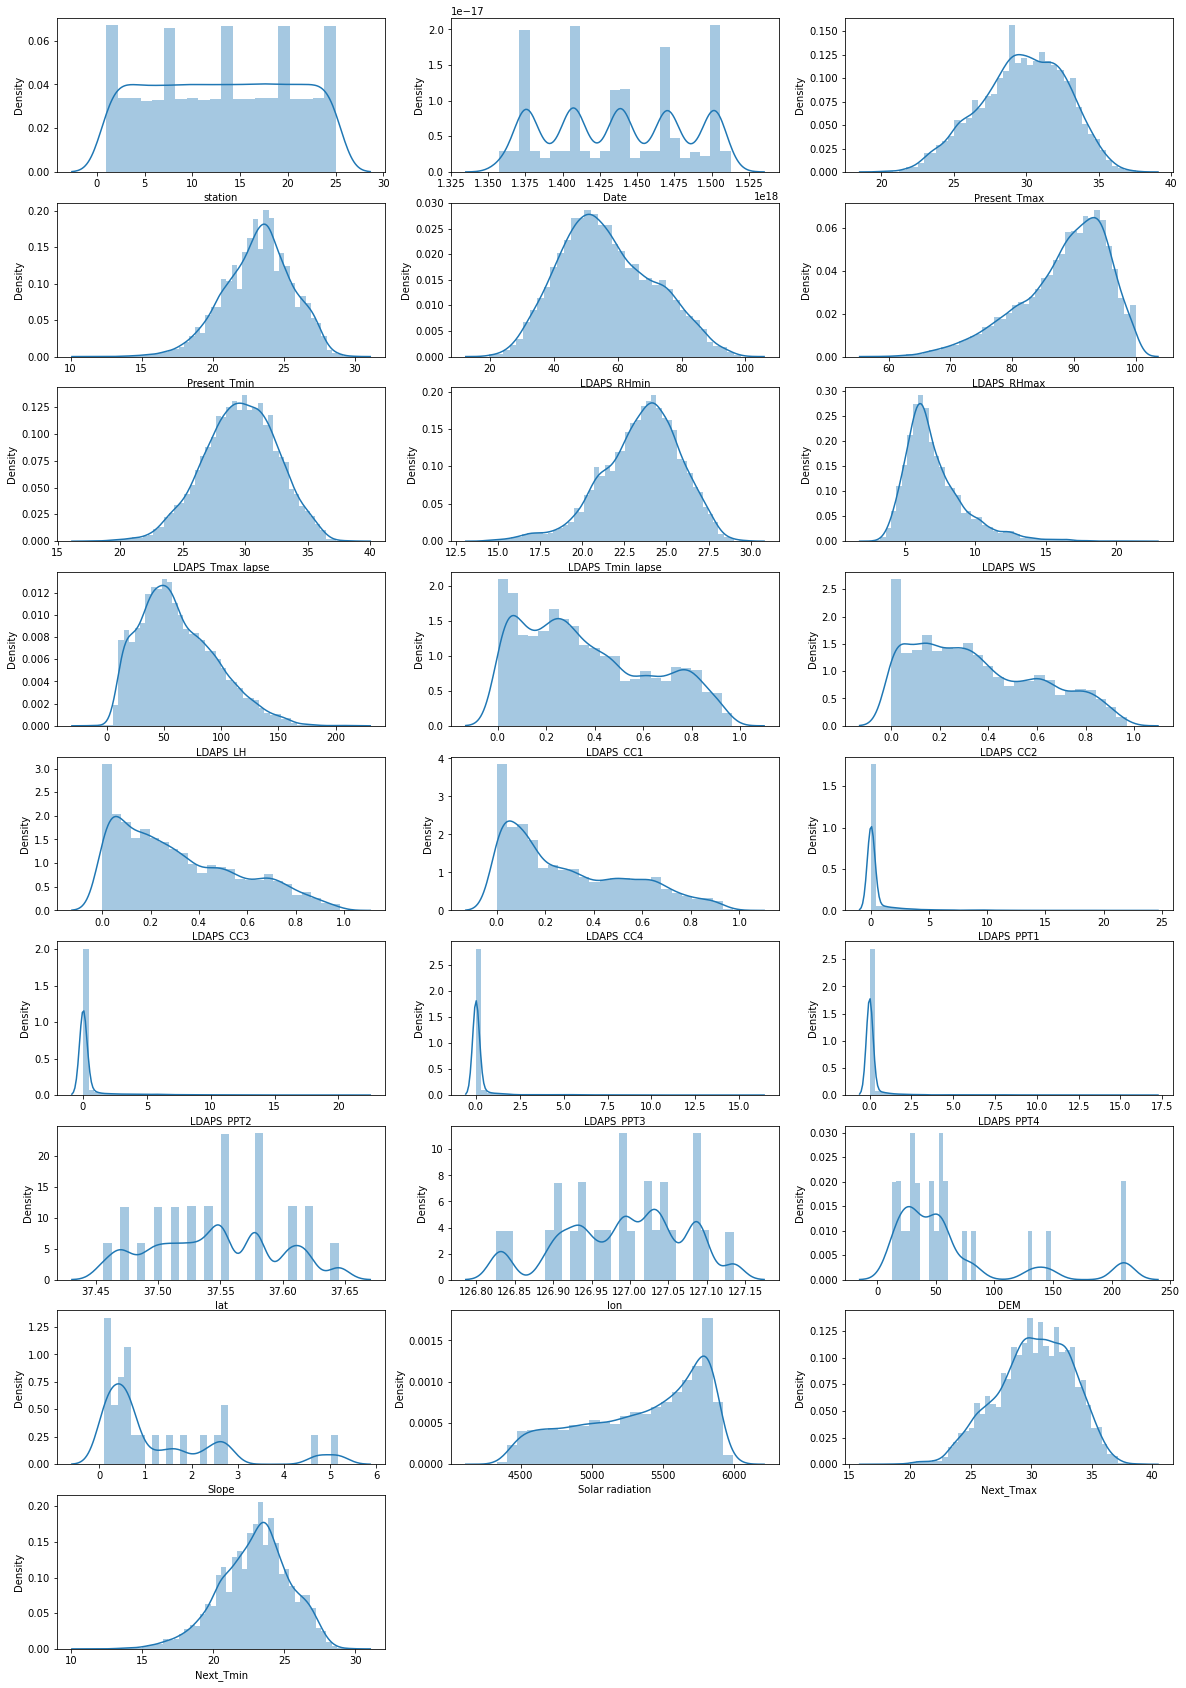

In [30]:
float_columns = ['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS','LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon','DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']
plt.subplots(figsize=(20, 30))
for i, column in enumerate(float_columns):
    plt.subplot(9,3, i + 1)
    sns.distplot(Df[column])
plt.show()

In [31]:
Df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,0.389368,0.166763,0.088897,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877


<AxesSubplot:>

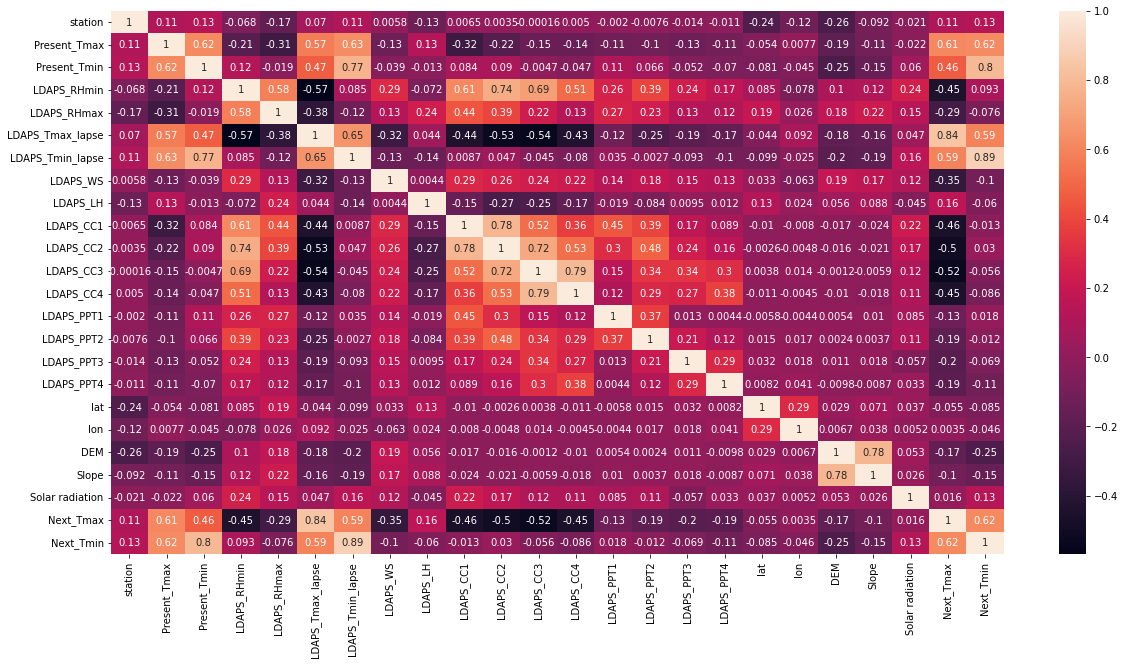

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(Df.corr(),annot=True)

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmin'>

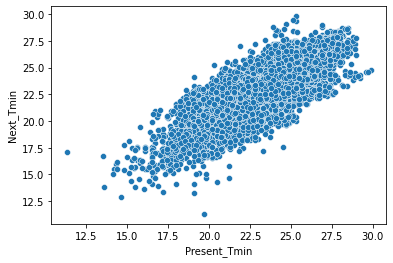

In [34]:
sns.scatterplot(x ="Present_Tmin", y="Next_Tmin", data = Df)


<AxesSubplot:xlabel='Date', ylabel='Next_Tmin'>

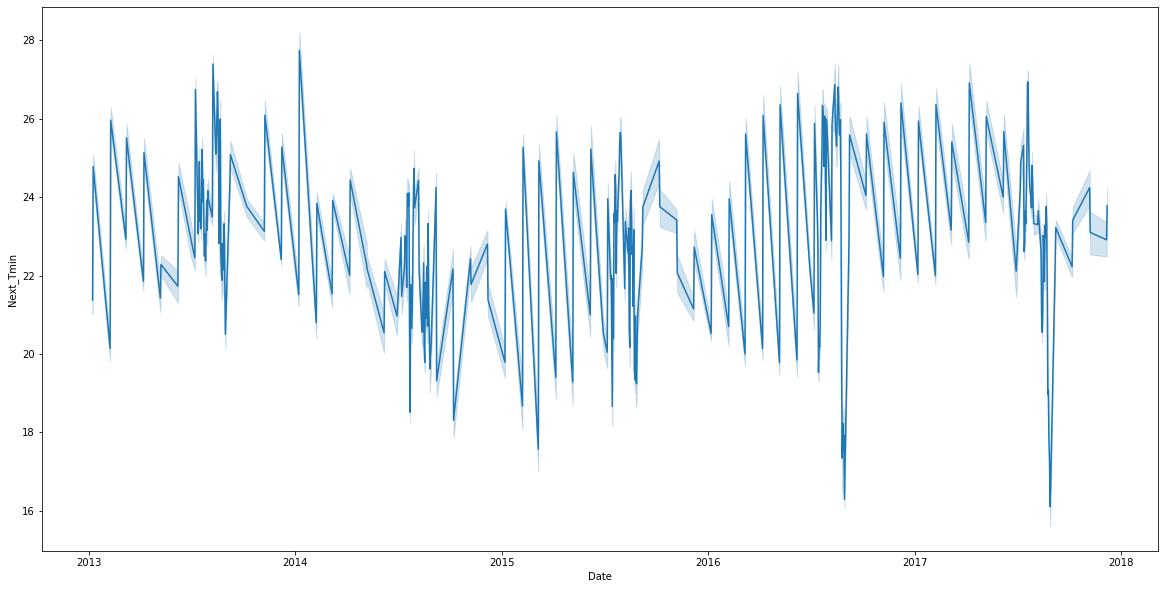

In [42]:
plt.figure(figsize=(20,10))
sns.lineplot(x ="Date", y="Next_Tmin", data = Df)

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

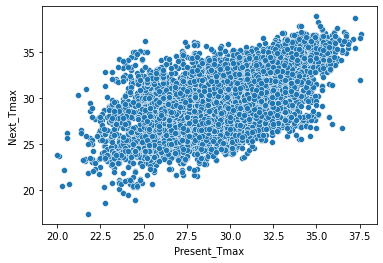

In [37]:
sns.scatterplot(x ="Present_Tmax", y="Next_Tmax", data = Df)


<AxesSubplot:xlabel='Date', ylabel='Next_Tmax'>

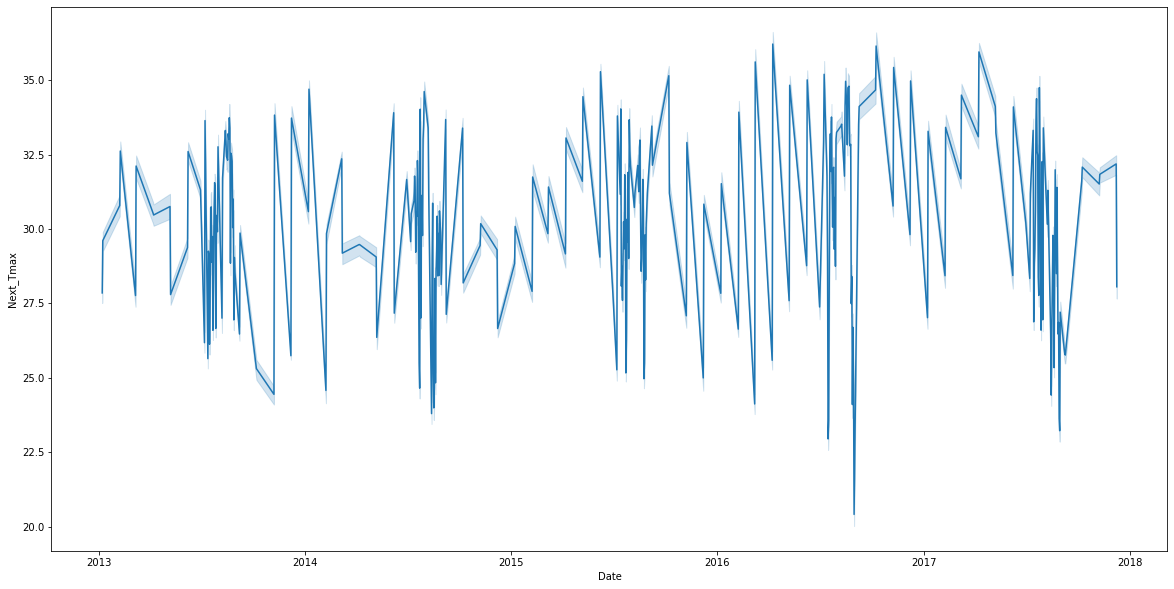

In [38]:
plt.figure(figsize=(20,10))
sns.lineplot(x ="Date", y="Next_Tmax", data = Df)

Now, we will change all the object values into numerical by using OrdinalEncoder

In [44]:
from sklearn.preprocessing import OrdinalEncoder
Enc=OrdinalEncoder()

for i in Df.columns:
    if Df[i].dtypes=='object':
        Df[i]=Enc.fit_transform(Df[i].values)
        
Df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [48]:
Df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [51]:
Df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [52]:
Df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

In [53]:
#As we can see, the dataset shows skewness. So, those with more than +/-0.5 should be treated

In [60]:
from sklearn.preprocessing import PowerTransformer
Pt = PowerTransformer(method='yeo-johnson')

In [61]:
cols = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS','LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon','DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']

Df_data = pd.DataFrame(Df,columns=cols)
Df_data[cols] = Pt.fit_transform(Df_data[cols].values)
Df_data[cols].head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,-1.857931,-0.400143,-0.785894,0.176401,0.271501,-0.556608,-0.311364,0.097802,0.318528,-0.407380,...,-0.521172,-0.4944,-0.447011,5.606626e-14,-0.027876,1.833902,1.311979,1.852498,-0.427261,-0.736665
1,-1.647078,0.709652,-0.708063,-0.237180,0.184890,0.041543,0.143619,-0.619344,-0.201095,-0.446317,...,-0.521172,-0.4944,-0.447011,5.606626e-14,0.498499,0.055065,-0.387168,1.398583,0.022083,-0.231427
2,-1.454383,0.600750,-0.014024,-0.496590,-0.769141,0.124659,0.392812,-0.309297,-1.380242,-0.522163,...,-0.521172,-0.4944,-0.447011,3.094747e-14,0.838708,-0.365481,-0.950272,1.378325,0.222466,0.352210
3,-1.274154,0.746176,0.028619,0.175337,1.309753,-0.008668,-0.173951,-0.650457,0.213209,-0.488978,...,-0.521172,-0.4944,-0.447011,9.342527e-14,0.368982,0.083964,1.233016,1.355226,0.427564,0.526566
4,-1.103275,0.528707,-0.589813,0.035570,0.110434,-0.209847,-0.103645,-0.587672,1.292312,-0.808553,...,-0.521172,-0.4944,-0.447011,5.800915e-15,1.876231,-0.291349,-0.403544,1.364282,0.256321,-0.231427


#                Let's Check the Outliers 

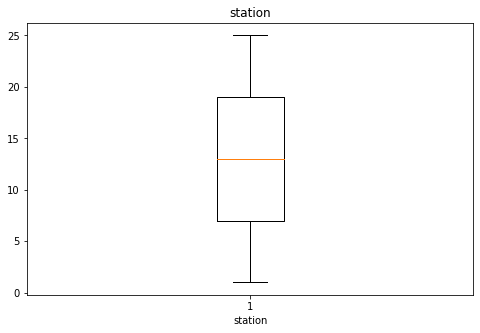

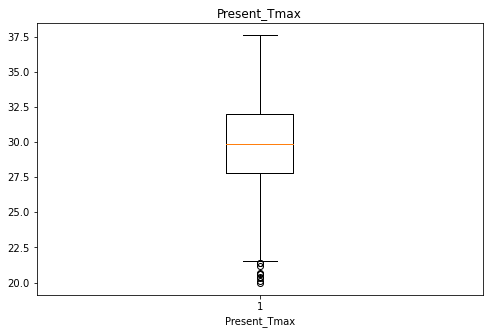

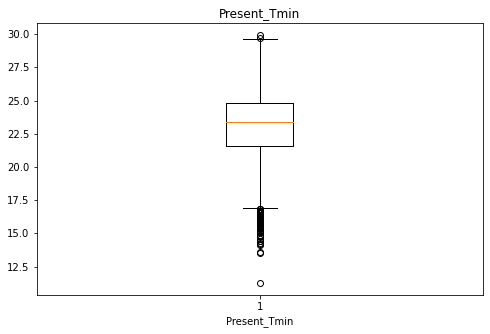

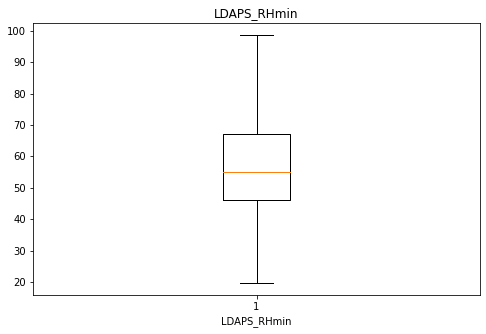

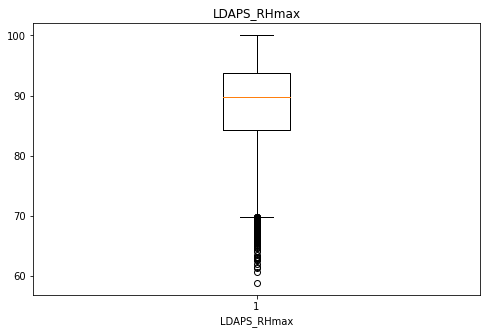

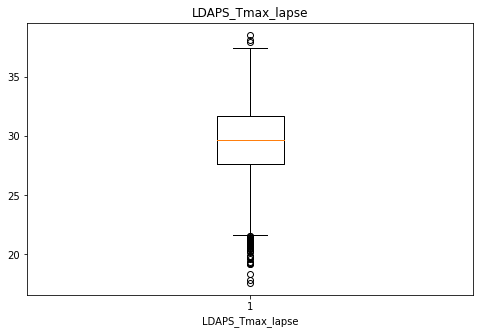

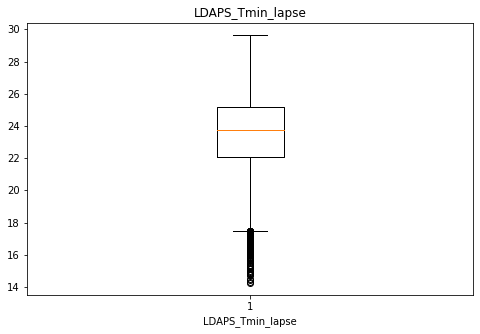

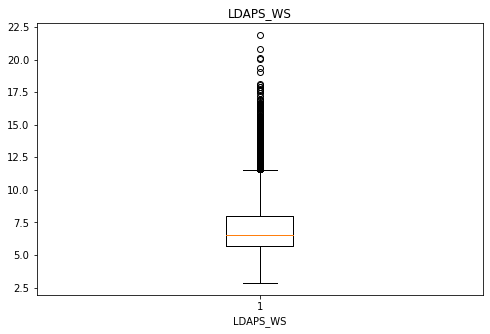

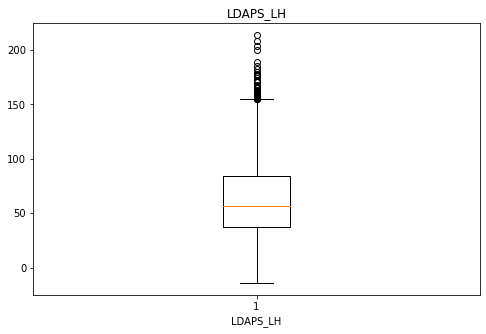

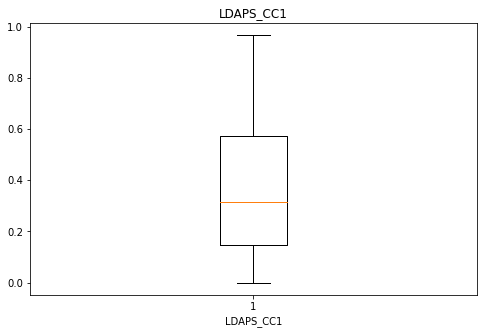

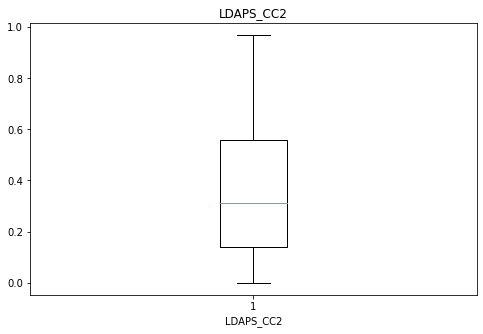

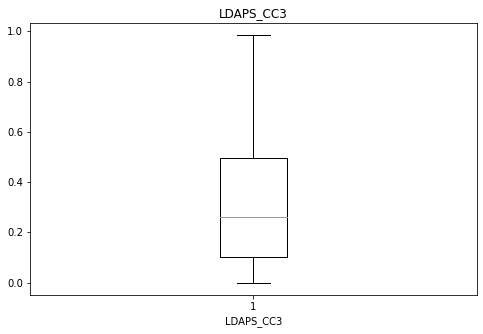

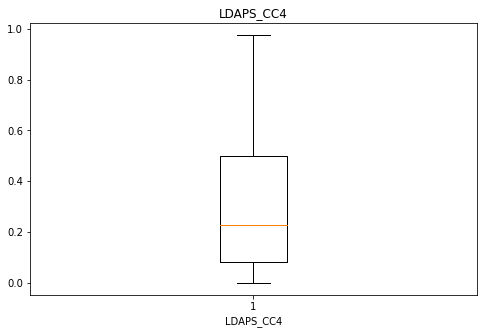

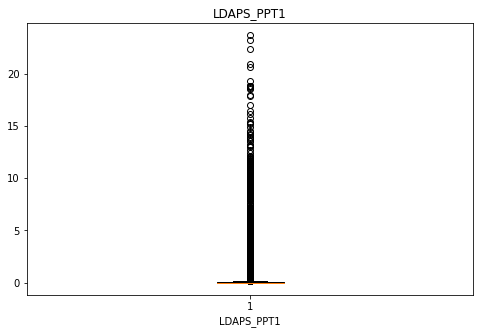

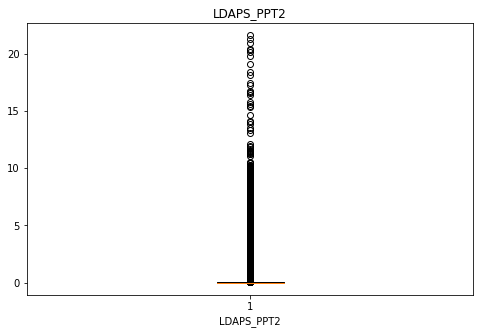

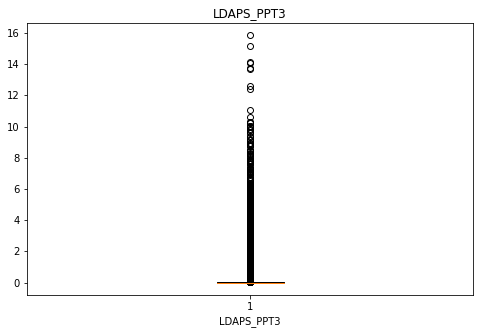

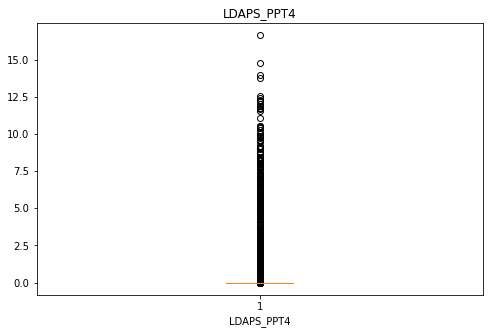

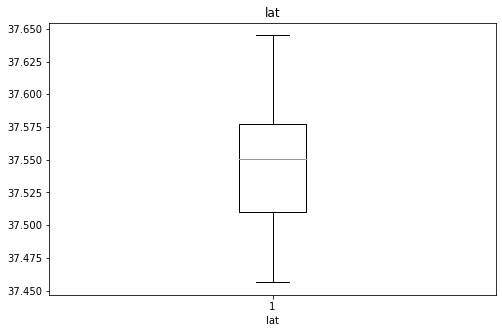

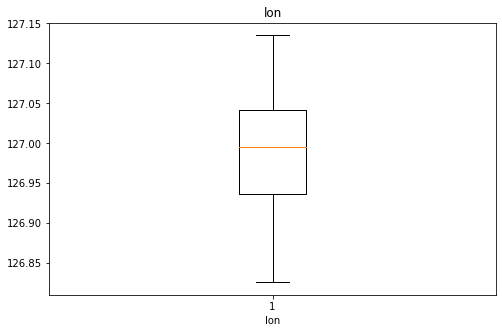

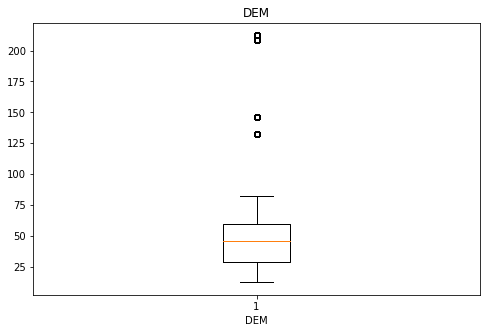

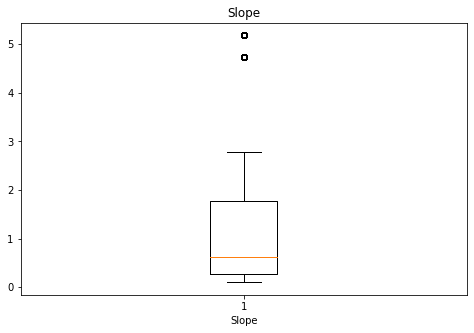

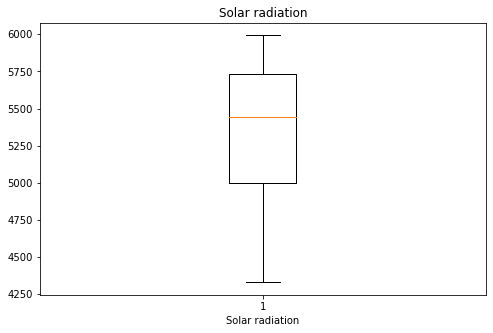

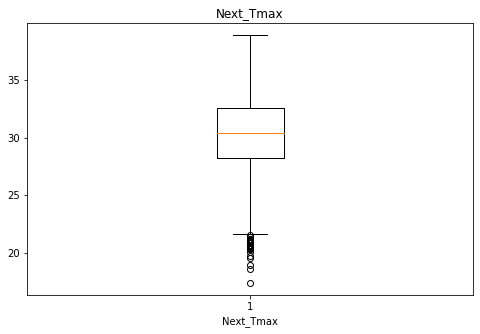

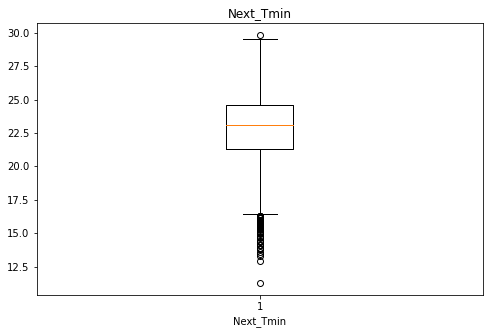

In [65]:
cols = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS','LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon','DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']
for j in cols:
    plt.figure(figsize=(8, 5))
    plt.boxplot(Df[j], vert=True)
    plt.title(j)
    plt.xlabel(j)
    plt.show()

In [68]:
from scipy.stats import zscore
columns = Df[['Present_Tmax', 'Present_Tmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS','LDAPS_LH','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','DEM', 'Slope', 'Next_Tmax', 'Next_Tmin']]
z=np.abs(zscore(columns))
np.where(z>3)

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64),
 array([5, 8, 8, ..., 1, 1, 4], dtype=int64))

In [69]:
z

,Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Next_Tmax,Next_Tmin
0,0.353318,0.748029,0.382768,0.525269,0.215525,0.126423,0.206603,0.305589,0.275777,0.239969,0.224971,2.769091,1.111162,0.366861,0.689265
1,0.725138,0.664721,0.311697,0.078334,0.223368,0.644133,0.313359,0.305589,0.275777,0.239969,0.224971,0.315828,0.543220,0.083068,0.165513
2,0.624033,0.043400,0.609425,0.160080,0.449896,0.439100,1.244497,0.305589,0.275777,0.239969,0.224971,0.526719,0.723891,0.275895,0.398527
3,0.758840,0.085054,1.128335,0.028710,0.079238,0.663353,0.096026,0.305589,0.275777,0.239969,0.224971,0.298272,0.928888,0.468721,0.559681
4,0.556630,0.539758,0.249244,0.171981,0.010803,0.624327,1.349989,0.305589,0.275777,0.239969,0.224971,0.494848,0.549485,0.308032,0.165513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,2.240616,2.247578,1.402898,0.614083,2.223667,0.225479,1.569844,0.305589,0.275777,0.239969,0.224971,0.655747,0.500966,0.848928,2.099366
7746,2.442826,2.414195,0.648815,0.990460,2.432415,0.609132,0.583486,0.305589,0.275777,0.239969,0.224971,0.735482,0.820711,0.720377,2.341098
7747,2.173212,2.539157,1.318376,1.110333,2.021883,0.434188,0.283984,0.305589,0.275777,0.239969,0.224971,0.852919,0.804538,0.623964,1.938212
7748,2.173212,2.289232,1.537141,0.886737,2.039881,0.253241,0.452772,0.305589,0.275777,0.239969,0.224971,0.821476,0.755800,0.527550,1.656192


In [70]:
new_data =Df[(z<3).all(axis=1)]
new_data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [71]:
new_data.shape

(6739, 25)

In [72]:
dataloss=(7752-6739)/7752*100 
dataloss

13.067595459236326

In [80]:
#We will also drop column which is not necessary for our predictions.

Df.drop(columns = ['Date'],inplace=True)

In [81]:
#Now spliting the data into x and y, where we'll separate the variables.

x = Df.drop(["Next_Tmax","Next_Tmin"], axis = 1)
y_max = Df["Next_Tmax"]
y_min = Df["Next_Tmin"]

In [82]:
print(x,y_max,y_min)

      station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233

Here we start with building the models

In [83]:
# Starting with Tmax using linear Regression & various methods

LR_max=LinearRegression()

In [84]:
for i in range(0,100):
    x_train,x_test,y_max_train,y_max_test=train_test_split(x,y_max,test_size=0.3,random_state=i)
    LR_max.fit(x_train,y_max_train)
    predict_train_max=LR_max.predict(x_train)
    predict_test_max=LR_max.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_max_train,predict_train_max)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_max_test,predict_test_max)}')
    print('\n')

At random state 0,the training accuracy is:0.7774101802844209
At random state 0,the testing accuracy is:0.789804324007217


At random state 1,the training accuracy is:0.7812539858937326
At random state 1,the testing accuracy is:0.7815578987158885


At random state 2,the training accuracy is:0.782972185654607
At random state 2,the testing accuracy is:0.7772357722016854


At random state 3,the training accuracy is:0.7804610132775569
At random state 3,the testing accuracy is:0.7830676368833789


At random state 4,the training accuracy is:0.7875532824933569
At random state 4,the testing accuracy is:0.7658081454377699


At random state 5,the training accuracy is:0.7779576151858888
At random state 5,the testing accuracy is:0.7897686426546064


At random state 6,the training accuracy is:0.7820358795834972
At random state 6,the testing accuracy is:0.7794914531690367


At random state 7,the training accuracy is:0.7785349134947473
At random state 7,the testing accuracy is:0.7877168928695313


At

At random state 71,the testing accuracy is:0.7852107100185565


At random state 72,the training accuracy is:0.7786398720836487
At random state 72,the testing accuracy is:0.7873235988409233


At random state 73,the training accuracy is:0.7772061495620233
At random state 73,the testing accuracy is:0.7905469676713769


At random state 74,the training accuracy is:0.7849722748875193
At random state 74,the testing accuracy is:0.7727148235628414


At random state 75,the training accuracy is:0.7794538201479937
At random state 75,the testing accuracy is:0.785424114525267


At random state 76,the training accuracy is:0.7817609933253319
At random state 76,the testing accuracy is:0.7800887936041216


At random state 77,the training accuracy is:0.7884212307583702
At random state 77,the testing accuracy is:0.7631541438871352


At random state 78,the training accuracy is:0.7865347005105203
At random state 78,the testing accuracy is:0.7678335584519254


At random state 79,the training accuracy is:0.77

In [87]:
x_train,x_test,y_max_train,y_max_test=train_test_split(x,y_max,test_size=0.3,random_state=99)
LR_max.fit(x_train,y_max_train)

LinearRegression()

In [88]:
print("R2 score:", r2_score(y_max_test,predict_test_max))
print("Mean absolute error:",mean_absolute_error(y_max_test,predict_test_max))
print("Mean squared error:",mean_squared_error(y_max_test,predict_test_max))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_max_test,predict_test_max)))

R2 score: 0.7838451916492124
Mean absolute error: 1.1219442083073452
Mean squared error: 2.1357527948255792
Root mean squared error: 1.4614214980030844


In [89]:
#Cross Validation
from sklearn.model_selection import cross_val_score

In [91]:
Train_accuracy=r2_score(y_max_train,predict_train_max)
Test_accuracy=r2_score(y_max_test,predict_test_max)

for c in range(2,10):
    CV_score=cross_val_score(LR_max,x,y_max,cv=c)
    CV_mean=CV_score.mean()
    print(f'At cross fold(c) the cv score is {CV_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold(c) the cv score is 0.7076762140725135 and accuracy score for training is 0.7800365109019236 and accuracy score for testing is 0.7838451916492124


At cross fold(c) the cv score is 0.7294262298408682 and accuracy score for training is 0.7800365109019236 and accuracy score for testing is 0.7838451916492124


At cross fold(c) the cv score is 0.7165559336002156 and accuracy score for training is 0.7800365109019236 and accuracy score for testing is 0.7838451916492124


At cross fold(c) the cv score is 0.721606754553904 and accuracy score for training is 0.7800365109019236 and accuracy score for testing is 0.7838451916492124


At cross fold(c) the cv score is 0.7174437452409883 and accuracy score for training is 0.7800365109019236 and accuracy score for testing is 0.7838451916492124


At cross fold(c) the cv score is 0.7108927360848677 and accuracy score for training is 0.7800365109019236 and accuracy score for testing is 0.7838451916492124


At cross fold(c) the cv score is 0.

In [105]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [106]:
Model = [DecisionTreeRegressor(), KNeighborsRegressor(), Lasso(), RandomForestRegressor()]

In [107]:
for mod in Model:
    print("Accuracy of a Model   :", mod)
    mod.fit(x_train,y_max_train)
    predict = mod.predict(x_test)
    print("R2 score     :", r2_score(y_max_test,predict))
    print("Mean absolute error   :", mean_absolute_error(y_max_test,predict))
    print("Mean squared error    :", mean_squared_error(y_max_test,predict))
    print("Root mean squared error   :", np.sqrt(mean_squared_error(y_max_test,predict)))
    mod_score = cross_val_score(mod,x,y_max, cv=4)
    print(mod_score)
    print("Cross Validation Score   :", mod_score.mean())
    print("-----------------------------------------------------------------------------")


Accuracy of a Model   : DecisionTreeRegressor()
R2 score     : 0.7730972144731864
Mean absolute error   : 1.0742204655248133
Mean squared error    : 2.241949934123847
Root mean squared error   : 1.497314240272845
[0.41502045 0.35530565 0.41392971 0.57301527]
Cross Validation Score   : 0.4393177697984195
-----------------------------------------------------------------------------
Accuracy of a Model   : KNeighborsRegressor()
R2 score     : 0.5341673705536595
Mean absolute error   : 1.661624945103206
Mean squared error    : 4.602735177865613
Root mean squared error   : 2.145398605822613
[ 0.40081315 -0.25834886  0.20514007  0.21759887]
Cross Validation Score   : 0.14130080644046017
-----------------------------------------------------------------------------
Accuracy of a Model   : Lasso()
R2 score     : 0.7201896649501348
Mean absolute error   : 1.3026188585440202
Mean squared error    : 2.7647115956541874
Root mean squared error   : 1.6627421915781735
[0.66453791 0.58441362 0.66865878

Hyperparameter Tuning of a Next_Tmax

In [102]:
from sklearn.model_selection import GridSearchCV

In [108]:
grid_parameters = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 4, 8, 10],  'max_features': ['none','sqrt','log2']}
RF_max = RandomForestRegressor()

Clf_max = GridSearchCV(RandomForestRegressor(), grid_parameters, cv=5)
Clf_max.fit(x_train, y_max_train)
Clf_max.best_params_  

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 300}

In [109]:
Clf_max_predict=Clf_max.best_estimator_.predict(x_test)

In [110]:
r2_score(y_max_test, Clf_max_predict)*100

90.83920838066003

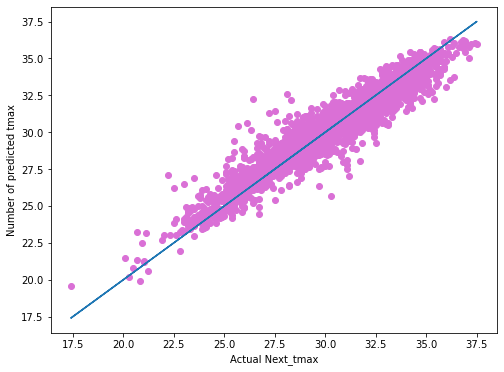

In [115]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_max_test,y=predict, c='orchid')
plt.plot(y_max_test,y_max_test)
plt.xlabel('Actual Next_tmax',fontsize=10)
plt.ylabel('Number of predicted tmax',fontsize=10)
plt.show()

In [116]:
# Now with Tmin

LR_min=LinearRegression()

In [117]:
for i in range(0,100):
    x_train,x_test,y_min_train,y_min_test=train_test_split(x,y_min,test_size=0.3,random_state=i)
    LR_min.fit(x_train,y_min_train)
    predict_train_min=LR_min.predict(x_train)
    predict_test_min=LR_min.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_min_train,predict_train_min)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_min_test,predict_test_min)}')
    print('\n')

At random state 0,the training accuracy is:0.8374529262584568
At random state 0,the testing accuracy is:0.8316597858573908


At random state 1,the training accuracy is:0.8372184774477585
At random state 1,the testing accuracy is:0.8318596884938853


At random state 2,the training accuracy is:0.8338550203895964
At random state 2,the testing accuracy is:0.8390493975891269


At random state 3,the training accuracy is:0.8360596971299302
At random state 3,the testing accuracy is:0.8351517401465156


At random state 4,the training accuracy is:0.8369949127818832
At random state 4,the testing accuracy is:0.8324794835117593


At random state 5,the training accuracy is:0.8347163760664746
At random state 5,the testing accuracy is:0.8377840831762203


At random state 6,the training accuracy is:0.8383380399154817
At random state 6,the testing accuracy is:0.8295982023673452


At random state 7,the training accuracy is:0.8312107266369329
At random state 7,the testing accuracy is:0.8459209352502282




At random state 75,the testing accuracy is:0.8335104371775237


At random state 76,the training accuracy is:0.8350422114859305
At random state 76,the testing accuracy is:0.8372773171881918


At random state 77,the training accuracy is:0.8373648775304428
At random state 77,the testing accuracy is:0.831614559855293


At random state 78,the training accuracy is:0.8358574173428002
At random state 78,the testing accuracy is:0.8342563427994079


At random state 79,the training accuracy is:0.8369352833824557
At random state 79,the testing accuracy is:0.8325325006176527


At random state 80,the training accuracy is:0.8361605600075716
At random state 80,the testing accuracy is:0.8350283397611167


At random state 81,the training accuracy is:0.8328982462820909
At random state 81,the testing accuracy is:0.8424516250318378


At random state 82,the training accuracy is:0.838033550722024
At random state 82,the testing accuracy is:0.8303831672046054


At random state 83,the training accuracy is:0.837

In [122]:
x_train,x_test,y_min_train,y_min_test=train_test_split(x,y_min,test_size=0.3,random_state=99)
LR_min.fit(x_train,y_min_train)

LinearRegression()

In [123]:
print("R2 score:", r2_score(y_min_test,predict_test_min))
print("Mean absolute error:",mean_absolute_error(y_min_test,predict_test_min))
print("Mean squared error:",mean_squared_error(y_min_test,predict_test_min))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_min_test,predict_test_min)))

R2 score: 0.8358684979572042
Mean absolute error: 0.7868903830526646
Mean squared error: 1.014220464625485
Root mean squared error: 1.0070851327596317


In [126]:
Training_accuracy=r2_score(y_min_train,predict_train_min)
Testing_accuracy=r2_score(y_min_test,predict_test_min)

for a in range(2,10):
    cv_score=cross_val_score(LR_min,x,y_min,cv=a)
    cv_mean=cv_score.mean()
    print(f'At cross fold(a) the cv score is {cv_mean} and accuracy score for training is {Training_accuracy} and accuracy score for testing is {Testing_accuracy}')
    print('\n')

At cross fold(a) the cv score is 0.8141189175501776 and accuracy score for training is 0.8355870128755729 and accuracy score for testing is 0.8358684979572042


At cross fold(a) the cv score is 0.784924299624293 and accuracy score for training is 0.8355870128755729 and accuracy score for testing is 0.8358684979572042


At cross fold(a) the cv score is 0.7887759623466826 and accuracy score for training is 0.8355870128755729 and accuracy score for testing is 0.8358684979572042


At cross fold(a) the cv score is 0.7841382045554054 and accuracy score for training is 0.8355870128755729 and accuracy score for testing is 0.8358684979572042


At cross fold(a) the cv score is 0.7655591887004918 and accuracy score for training is 0.8355870128755729 and accuracy score for testing is 0.8358684979572042


At cross fold(a) the cv score is 0.7736868685404962 and accuracy score for training is 0.8355870128755729 and accuracy score for testing is 0.8358684979572042


At cross fold(a) the cv score is 0.

In [133]:
knn_min = KNeighborsRegressor()

In [135]:
knn_min.fit(x_train, y_min_train)
knn_min.score(x_train,y_min_train)
knn_predict=knn_min.predict(x_test)

knn_score= r2_score(y_min_test, knn_predict)
print('R2 Score:', knn_score*100)

knn_cvscore=cross_val_score(knn_min,x,y_min, cv=4)
CV_mean=knn_cvscore.mean()
print('Cross val Score :',CV_mean*100)

R2 Score: 53.432326879005096
Cross val Score : 7.719072868397115


In [149]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [150]:
Model = [DecisionTreeRegressor(), Lasso(), RandomForestRegressor(), SVR()]

In [151]:
for mod in Model:
    print("Accuracy of a Model   :", mod)
    mod.fit(x_train,y_min_train)
    predicted_model = mod.predict(x_test)
    print("R2 score     :", r2_score(y_min_test,predicted_model))
    print("Mean absolute error   :", mean_absolute_error(y_min_test,predicted_model))
    print("Mean squared error    :", mean_squared_error(y_min_test,predicted_model))
    print("Root mean squared error   :", np.sqrt(mean_squared_error(y_min_test,predicted_model)))
    model_score = cross_val_score(mod,x,y_min, cv=4)
    print(model_score)
    print("Cross Validation Score   :", model_score.mean())
    print("-----------------------------------------------------------------------------")


Accuracy of a Model   : DecisionTreeRegressor()
R2 score     : 0.8001194458580105
Mean absolute error   : 0.8209925340360124
Mean squared error    : 1.235125164690382
Root mean squared error   : 1.1113618513744217
[0.38384231 0.53041586 0.66813543 0.75176156]
Cross Validation Score   : 0.5835387903076455
-----------------------------------------------------------------------------
Accuracy of a Model   : Lasso()
R2 score     : 0.7871900543385748
Mean absolute error   : 0.9052618225410373
Mean squared error    : 1.3150199643538114
Root mean squared error   : 1.1467431989568595
[0.7098952  0.65427649 0.77665276 0.82237188]
Cross Validation Score   : 0.7407990817258451
-----------------------------------------------------------------------------
Accuracy of a Model   : RandomForestRegressor()
R2 score     : 0.9037937859597505
Mean absolute error   : 0.5863421168203775
Mean squared error    : 0.5944886258234521
Root mean squared error   : 0.7710308851294169
[0.7014613  0.71769374 0.8273958

Hyperparameter Tuning of a Next_Tmin

In [152]:
from sklearn.model_selection import GridSearchCV

In [160]:
Grid_parameter = {'n_estimators': [100, 200, 300], 'min_samples_split': [None, 2, 4, 8],  'max_features': ['none','sqrt','log2']}
RF_min = RandomForestRegressor()

Clf_min = GridSearchCV(RandomForestRegressor(), Grid_parameter, cv=4)
Clf_min.fit(x_train, y_min_train)
Clf_min.best_params_  

{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}

In [161]:
 Clf_min_predict=Clf_min.best_estimator_.predict(x_test)

In [162]:
r2_score(y_min_test, Clf_min_predict)*100

91.38956827314445

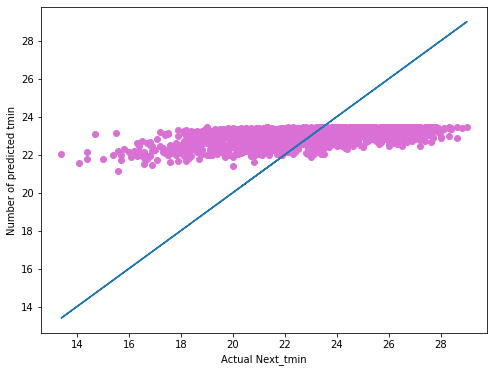

In [163]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_min_test,y=predicted_model, c='orchid')
plt.plot(y_min_test,y_min_test)
plt.xlabel('Actual Next_tmin',fontsize=10)
plt.ylabel('Number of predicted tmin',fontsize=10)
plt.show()

In [164]:
import joblib
joblib.dump(RF_max, "Temperature_Forecast_Project_Next_Tmax.pkl")

['Temperature_Forecast_Project_Next_Tmax.pkl']

In [165]:
joblib.dump(RF_min, "Temperature_Forecast_Project_Next_Tmin.pkl")

['Temperature_Forecast_Project_Next_Tmin.pkl']

In [168]:
New_Rf_max = joblib.load(open("Temperature_Forecast_Project_Next_Tmax.pkl",'rb'))
New_Rf_max.fit(x_train, y_max_train)
result=New_Rf_max.score(x_test,y_max_test)
print(result*100)

89.72679144215977


In [171]:
New_Rf_min = joblib.load(open("Temperature_Forecast_Project_Next_Tmin.pkl",'rb'))
New_Rf_min.fit(x_train, y_min_train)
result=New_Rf_min.score(x_test,y_min_test)
print(result*100)

90.33239109394793


In [173]:
New_Data = pd.DataFrame([New_Rf_max.predict(x_test)[:],predict[:]],index=['Predicted','Original'])
New_Data

,0,1,2,3,4,5,6,7,8,9,...,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276
Predicted,31.398,26.961,29.786,32.019,33.361,34.687,34.721,35.205,35.526,29.434,...,30.958,31.564,33.440,25.722,34.450,35.059,29.429,31.340,33.374,27.302
Original,31.599,26.869,29.734,31.949,33.493,34.788,34.803,35.231,35.931,29.306,...,30.765,31.557,33.176,25.593,34.346,35.059,29.303,31.484,33.481,27.207


In [174]:
New_Data = pd.DataFrame([New_Rf_min.predict(x_test)[:],predicted_model[:]],index=['Predicted','Original'])
New_Data

,0,1,2,3,4,5,6,7,8,9,...,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276
Predicted,20.910000,23.842000,21.479000,23.024000,24.032000,24.985000,26.819000,26.003000,24.86400,24.428000,...,25.610000,22.605000,26.104000,20.388000,24.946000,26.035000,24.610000,22.672000,21.794000,23.412000
Original,23.364123,23.412555,23.361178,23.299261,23.412358,23.436759,23.245451,23.169762,23.19485,22.680019,...,23.377734,23.036868,23.126464,22.827885,23.320884,22.623995,23.348249,23.238992,23.116003,23.336874
